In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_dir = r"D:\Python projects\Machine Learning\Pneumonia Classification\chest_xray\train"
test_dir = r"D:\Python projects\Machine Learning\Pneumonia Classification\chest_xray\test"

CATEGORIES = ['PNEUMONIA','NORMAL']

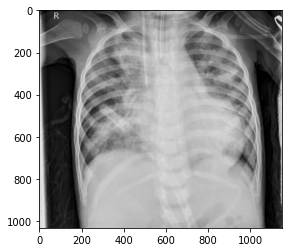

In [3]:
for category in CATEGORIES:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
print(img_array.shape)

(1032, 1152, 3)


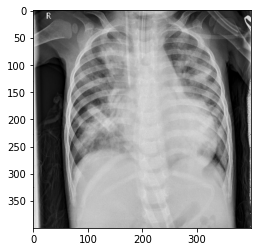

In [5]:
IMG_SIZE= 400
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [6]:
train_data = []
test_data = []
def get_data(directory, list_dir):
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                list_dir.append([new_array, class_num])
            except Exception as e:
                pass
            
get_data(train_dir, train_data)
get_data(test_dir, test_data)

In [7]:
len(train_data), len(test_data)

(5232, 624)

In [8]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

In [9]:
X_train = []
y_train = []
X_test = []
y_test = []

def split_train_test(data, img, labels):
    for i in data:
        img.append(i[0])
        labels.append(i[1])
                          
split_train_test(train_data, X_train,y_train)
split_train_test(test_data, X_test,y_test)  

In [10]:
X_train = np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE,1)
X_test = np.array(X_test).reshape(-1,IMG_SIZE, IMG_SIZE,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
X_train.shape

(5232, 400, 400, 1)

In [12]:
y_train[:5]

array([0, 0, 0, 0, 1])

In [13]:
X_test.shape

(624, 400, 400, 1)

In [14]:
y_test[:5]

array([0, 1, 1, 0, 1])

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten, Dropout

In [16]:
model = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,1)),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(150, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 199, 199, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 98, 98, 32)        0

In [19]:
history = model.fit(X_train,y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
131/131 [==============================] - 302s 2s/step - loss: 100.4977 - accuracy: 0.8057 - val_loss: 0.4312 - val_accuracy: 0.8539
Epoch 2/5
131/131 [==============================] - 292s 2s/step - loss: 0.2236 - accuracy: 0.9137 - val_loss: 0.3212 - val_accuracy: 0.8883
Epoch 3/5
131/131 [==============================] - 297s 2s/step - loss: 0.1811 - accuracy: 0.9254 - val_loss: 0.2496 - val_accuracy: 0.9064
Epoch 4/5
131/131 [==============================] - 277s 2s/step - loss: 0.1302 - accuracy: 0.9515 - val_loss: 0.2940 - val_accuracy: 0.8902
Epoch 5/5
131/131 [==============================] - 281s 2s/step - loss: 0.1157 - accuracy: 0.9572 - val_loss: 0.3246 - val_accuracy: 0.8844


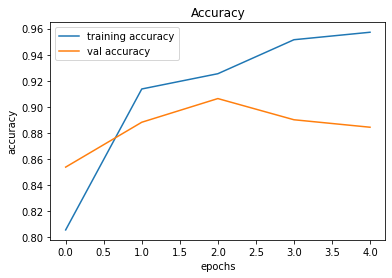

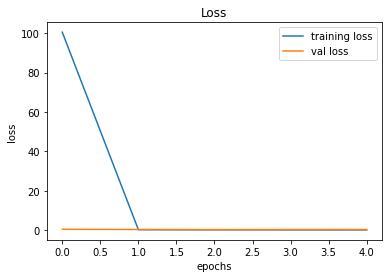

In [20]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 8s 414ms/step - loss: 0.6358 - accuracy: 0.8013


[0.6358477473258972, 0.8012820482254028]

In [22]:
predictions = model.predict(X_test)

In [23]:
predictions[:5]

array([[3.0845910e-02],
       [3.3626813e-01],
       [8.5213667e-01],
       [3.8418174e-04],
       [6.3469487e-01]], dtype=float32)

In [25]:
predicted = []
for i in predictions:
    if i>0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [26]:
predicted[:5]

[0, 0, 1, 0, 1]

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

Text(33.0, 0.5, 'Truth')

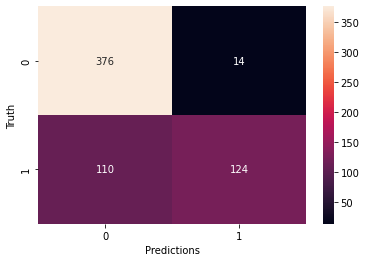

In [29]:
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [30]:
model.save("pneumonia_classification.h5")